# K-means

### Implémentation


In [1]:
import math
import random

from numba import njit
import time
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [72]:
@njit
def initialize_centers(data, k):
    # Sélectionne k points aléatoires comme centres initiaux
    indices = np.random.choice(len(data), k, replace=False)
    centers = data[indices]
    return centers

@njit
def assign_points(data, centers):
    clusters = []
    for point in data:
        # Trouve l'indice du centre le plus proche pour chaque point
        # distances = np.linalg.norm(centers - point, axis=1)
        # cluster_index = np.argmin(distances)
        # clusters.append(cluster_index)
        distances = np.sqrt(np.sum((centers - point) ** 2, axis=1))
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

@njit
def update_centers(data, clusters, old_centers):
    # new_centers = []
    # for i in range(len(old_centers)):
    #     # Calcule le nouveau centre comme la moyenne des points du cluster
    #     points = data[clusters == i]
    #     new_center = np.mean(points, axis=0)
    #     new_centers.append(new_center)
    new_centers = np.zeros_like(old_centers)
    counts = np.zeros(len(old_centers))
    for i in range(len(old_centers)):
        points = data[clusters == i]
        counts[i] = len(points)
        new_centers[i] = np.sum(points, axis=0)
    for i in range(len(old_centers)):
        if counts[i] != 0:
            new_centers[i] /= counts[i]
    return new_centers


def kmeans_star(data, k, max_iterations=100):
    # Initialisation des centres initiaux
    centers = initialize_centers(data, k)
    for iteration in range(max_iterations):
        start_time = time.time()
        # Attribution des points aux centres les plus proches
        clusters = assign_points(data, centers)
        # Mise à jour des centres
        new_centers = update_centers(data, clusters, centers)
        if np.all(centers == new_centers):
            break
        centers = new_centers
        end_time = time.time()
        iteration_time = end_time - start_time
        print(f"Iteration {iteration + 1}: {iteration_time} seconds")
    return clusters, centers

n_clusters = 10
x_train_normalized = x_train.reshape(-1, 28*28).astype(float)
clusters, centers = kmeans_star(x_train_normalized, n_clusters, max_iterations=10)

Iteration 1: 1.825500249862671 seconds
Iteration 2: 0.6854922771453857 seconds
Iteration 3: 0.655498743057251 seconds
Iteration 4: 0.6584997177124023 seconds
Iteration 5: 0.6300008296966553 seconds
Iteration 6: 0.6180074214935303 seconds
Iteration 7: 0.6559998989105225 seconds
Iteration 8: 0.6369919776916504 seconds
Iteration 9: 0.6429998874664307 seconds
Iteration 10: 0.644000768661499 seconds


## Réduction de dimension

In [73]:
clusters

array([0, 4, 5, ..., 0, 7, 0], dtype=int64)

In [48]:
len(clusters)

60000

In [74]:
import math

distances = []
for i, x in enumerate(x_train_normalized):
    shortest_dist = []
    for cluster_index in range(n_clusters):
        distance = math.dist(centers[cluster_index], x)
        shortest_dist.append(distance)
    shortest_dist = list(sorted(shortest_dist))[:2]
    distances.append(shortest_dist)
distances = np.array(distances)
# * 255.0

In [77]:
distances

array([[1701.66100837, 1879.74459424],
       [1332.77321302, 1953.93247994],
       [1691.99333522, 2076.82305095],
       ...,
       [1696.20452328, 1783.65297393],
       [1654.78600665, 1878.70851966],
       [1729.4516854 , 1759.08100311]])

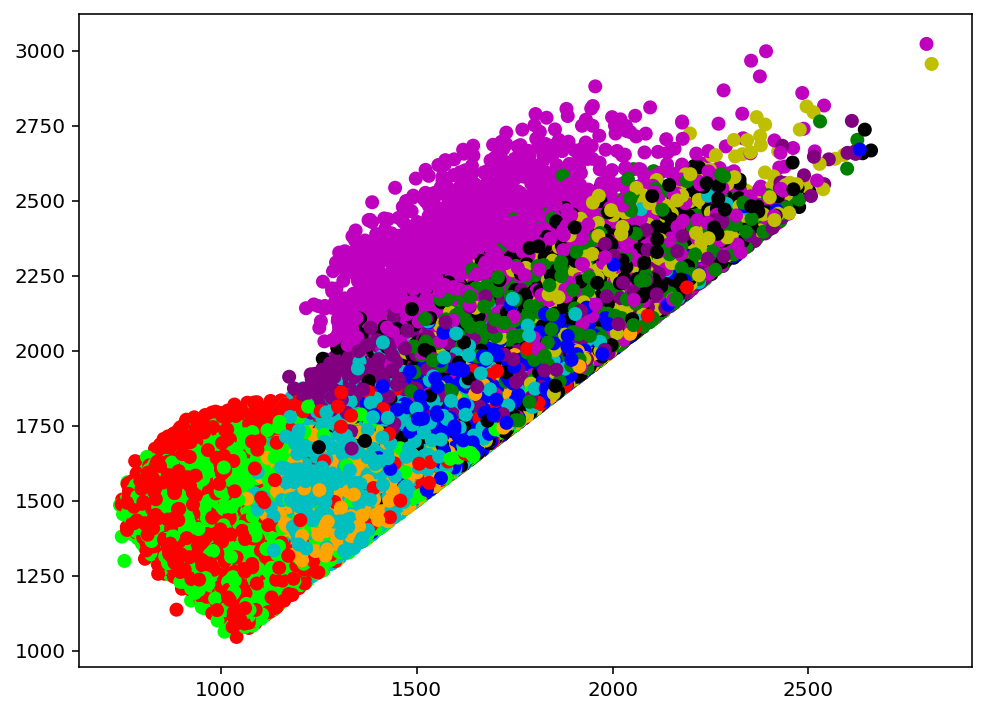

In [75]:
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']
clusters_colors = [colors[i] for i in clusters]
plt.scatter(distances[:, 0], distances[:, 1], c=clusters_colors, label=f'Cluster {i}')

In [56]:
for n in range(n_clusters):
    i = random.randint(0, 10)
    cluster_points = list_reduc[clusters == n]

# for i in range(60000):
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[n], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualization of K-means Clusters')
plt.legend()
plt.show()


array([[6.77152544, 7.33330971],
       [4.93082822, 6.66925229],
       [6.62747172, 8.16152214],
       [3.8597333 , 6.82643511],
       [5.47047285, 6.23104789],
       [6.9000633 , 7.17804693],
       [4.60904202, 6.72479997],
       [6.17239233, 7.25612087],
       [3.64390238, 6.19306697],
       [5.91275453, 7.16691848],
       [6.23598521, 6.2791267 ],
       [5.79818374, 6.90112126],
       [6.34567975, 8.968977  ],
       [5.8619166 , 7.65468422],
       [3.67571608, 6.09508564],
       [4.70690905, 6.93719468],
       [6.88719107, 7.65584228],
       [5.75068624, 6.39011871],
       [6.36990443, 6.51121407],
       [5.1654549 , 5.96452268]])

In [43]:
list_reduc = np.array(list_reduc)

In [44]:
print(list_reduc)

[6.77152544 4.93082822 6.62747172 ... 6.74015796 6.5761297  6.76970174]


In [21]:
import random

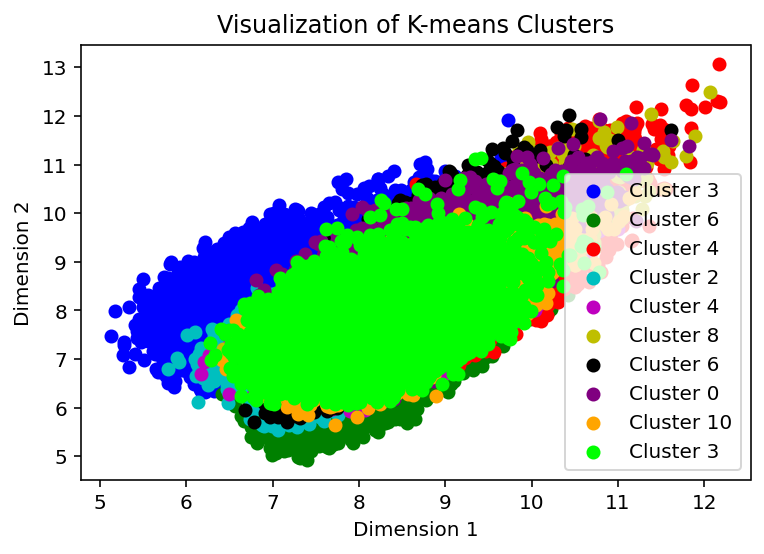

In [24]:
for n in range(n_clusters):
    i = random.randint(0, 10)
    cluster_points = list_reduc[clusters == n]

# for i in range(60000):
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[n], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualization of K-means Clusters')
plt.legend()
plt.show()


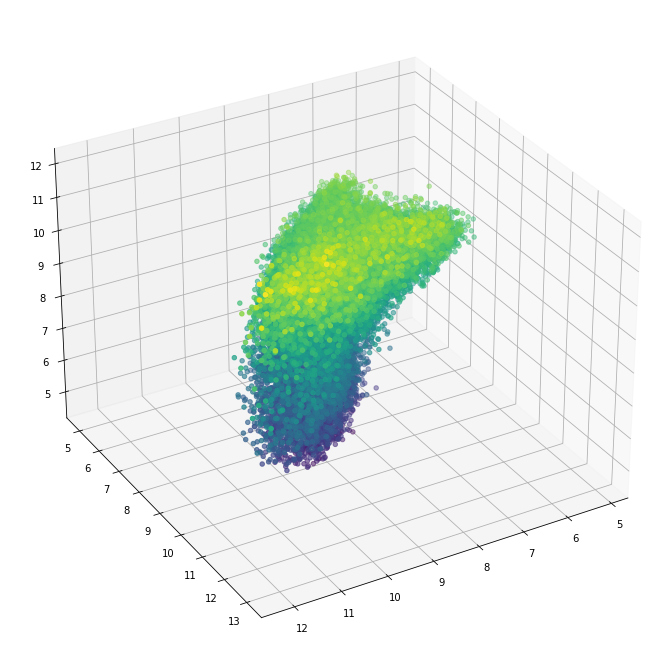

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.azim = 60
ax.dist = 10
ax.elev = 30
sequence_containing_x_vals = list_reduc[:, 0]
sequence_containing_y_vals = list_reduc[:, 1]
sequence_containing_z_vals = list_reduc[:, 2]


ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=list_reduc[:,2])
plt.show()

## Compression / Décompression

In [42]:
def plot_digits_with_Y(X, Y):
    """
    Afficher les 10 premiers chiffres de chaque chiffre
    """
    fig, axs = plt.subplots(10, 10, figsize=(5, 5))
    for digit in range(10):
        digit_indices = np.where(Y == digit)[0][:10]  # Sélectionner les indices des 10 premiers échantillons du chiffre
        for i, idx in enumerate(digit_indices):
            ax = axs[digit, i]
            ax.imshow(X[idx], cmap='gray')
            ax.axis('off')

NameError: name 'labels' is not defined

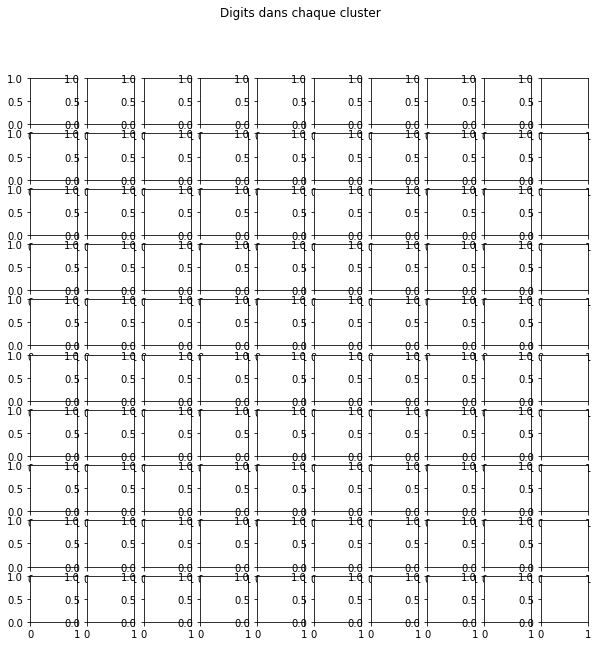

In [15]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = data[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.show()

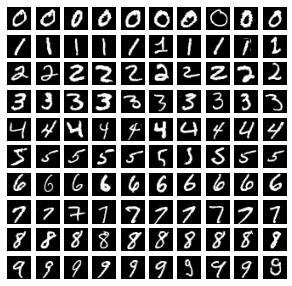

NameError: name 'labels' is not defined

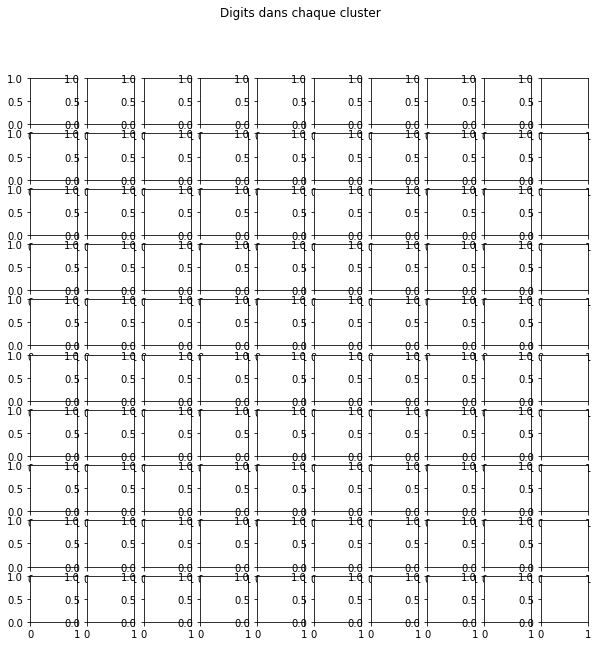

In [41]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = x_test[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.show()